#### 독립변수, 종속변수
- 독립변수: 모델에서 입력되는 변수, 예측을 위해 사용됨. 다른 변수에 영향받지 않음. 종속변수에 영향을 주는 변수.
- 종속변수: 독립변수에 의해 영향을 받는 변수, 모델이 예측해야 하는 값.
- 예) 공부시간(독립변수) -> 시험점수(종속변수) (target value, label)

### 회귀 (Regression)
- 연속형 변수를 예측하는 기법.
- 가장 일반적인 방법은 선형 회귀(Linear Regression).
- 다중 회귀(Multiple Regression): 여러 개의 독립변수를 사용하여 종속변수를 예측.

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 예제 데이터
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)    # 독립변수
y = np.array([2, 4, 5, 4, 5])                   # 종속변수

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)             # train

# 회귀 계수 확인
print("기울기 (slope):", model.coef_)
print("절편 (intercept):", model.intercept_)

기울기 (slope): [0.6]
절편 (intercept): 2.2


|지표|설명|---|
|------|---|---|
|MSE(Mean Squared Error)|예측값과 실제값 차이의 제곱 평균| 낮을수록 좋은 모델 | 
|RMSE(Root Mean Squared Error)|MSE의 제곱근, 모델의 평균 오차 크기| 낮은수록 좋은 모델 |
|R² (결정계수)|모델이 데이터를 얼마나 설명하는지 나타내는 값 (0~1)| 높을 수록 좋은 모델 |

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# 예측값 생성
y_pred = model.predict(X)

# 평가 지표 계산
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 0.47999999999999987
R² Score: 0.6000000000000001


In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 캘리포니아 주택 가격 데이터 로드
data = fetch_california_housing()
X, y = data.data, data.target           # x : 독립변수, y : 타겟 레이블, 종속변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge 회귀 모델 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = ridge_model.predict(X_test)        # y_pred : prediction result
mse = mean_squared_error(y_test, y_pred)    # y_test : real value 
r2 = r2_score(y_test, y_pred)

print("Ridge 회귀 모델 평가 결과:")
print("MSE:", mse)
print("R² Score:", r2)

Ridge 회귀 모델 평가 결과:
MSE: 0.5558034669932196
R² Score: 0.5758549611440138


### 분류(Classification)
- 데이터를 특정 카테고리로 예측하는 기법.
- 대표적인 방법:
>- 로지스틱 회귀(Logistic Regression)
>- 의사결정나무(Decision Tree)
>- 랜덤 포레스트(Random Forest)
>- 서포트 벡터 머신(SVM)
>- XGboost

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# 정확도 확인
print("모델 정확도:", clf.score(X_test, y_test))

모델 정확도: 1.0


In [11]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 숫자 데이터 로드
digits = load_digits()
X, y = digits.data, digits.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류 모델 학습
clf_digits = RandomForestClassifier(n_estimators=100, random_state=42)
clf_digits.fit(X_train, y_train)

# 모델 평가
y_pred_digits = clf_digits.predict(X_test)
print("숫자 이미지 분류 모델 평가 결과:")
print(classification_report(y_test, y_pred_digits))

숫자 이미지 분류 모델 평가 결과:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



|지표|설명|
|------|---|
|정확도(Accuracy)|전체 샘플 중 올바르게 예측한 비율|
|정밀도(Precision)|모델이 **긍정(Positive)**으로 예측한 것 중 실제로 맞은 비율|
|재현율(Recall, Sensitivity)|실제 긍정 클래스 중 모델이 정확히 맞춘 비율|
|F1-score|정밀도와 재현율의 조화 평균|


In [ ]:
from sklearn.metrics import classification_report

# 예측값 생성
y_pred = clf.predict(X_test)

# 평가 보고서 출력
print(classification_report(y_test, y_pred))

#### Confusion matrix(혼동행렬)
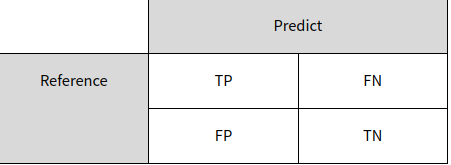

- TP(True positive) : 실제 True인데, 분류모델에서 예측이 True라고 판단된 경우 -> 모델이 맞는걸 맞다고 잘 예측
- TN(True negative) : 실제 False인데, 분류모델에서 예측이 False라고 판단된 경우 -> 모델이 아닌걸 아니다라고 잘 예측
- FP(False positive, 1종 오류) : 실제 False인데, 분류모델에서 예측이 True라고 판단된 경우
- FN(False negative, 2종 오류) : 실제 True인데, 분류모델에서 예측이 False라고 판단된 경우

>- 예시)
>- 1종오류 : 건강한 사람을 환자로 진단
>- 2종오류 : 암환자를 정상으로 진단

- Precison : FP를 줄이는데 초점, 예) 스팸 필터에서 일반 메일이 스팸으로 분류될 가능성 감소
- Recall : FN을 줄이는데 초점, 예) 암 진단에서 실제 암 환자를 놓치는 경우를 최소화